In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [192]:
df = pd.read_csv('Dataset/IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [193]:
print("Shape:", df.shape)
print("Columns:", df.columns)



Shape: (15509, 10)
Columns: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [194]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [195]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [196]:
# Remove rows without rating
df.dropna(subset=['Duration', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
df = df.dropna(subset=['Rating'])

# Clean & convert columns
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(float)
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Drop rows with missing values
df = df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes', 'Duration', 'Year'])


In [197]:
# One-hot encode Genre
genre_encoded = pd.get_dummies(df['Genre'], prefix='Genre')

# Label encode names
le = LabelEncoder()
df['Director_enc'] = le.fit_transform(df['Director'])
df['Actor1_enc'] = le.fit_transform(df['Actor 1'])
df['Actor2_enc'] = le.fit_transform(df['Actor 2'])
df['Actor3_enc'] = le.fit_transform(df['Actor 3'])


In [198]:
features = ['Genre', 'Director', 'Votes']
target = 'Rating'
df = df[features + [target]]


In [199]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'].astype(str))
df['Director'] = le.fit_transform(df['Director'].astype(str))
df['Votes'] = le.fit_transform(df['Votes'].astype(str))


In [200]:
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [201]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [202]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.0662499705535924
RMSE: 1.3469285934938202
R² Score: 0.020265769637359377


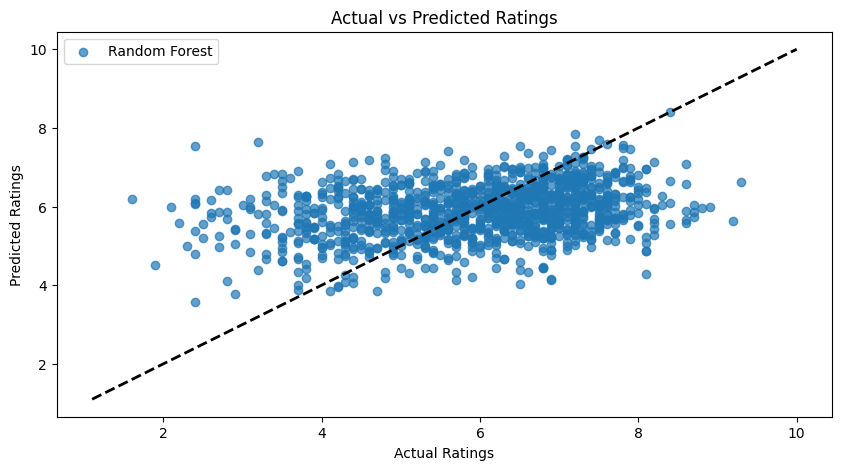

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.legend()
plt.show()
